In [1]:
# library imports
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("clean_data/train.csv")
train_df.head()

,Unnamed: 0,station_id,Ammonium_2019,Ammonium_2020,Coli-like-bacteria_2019,Coli-like-bacteria_2020,Colony-count-at-22-C_2019,Colony-count-at-22-C_2020,Color-Pt/Co-scale_2019,Color-Pt/Co-scale_2020,...,Odour-dilution-level_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,2,205,0.050,0.240000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.0,1.00,1.0,1.0,7.80,7.70,0,0,0
1,3,1228,0.090,0.050000,0.0,0.0,15.0,2.0,4.0,4.0,...,1.25,1.0,1.25,0.5,0.5,7.44,7.58,0,0,0
2,4,470,0.060,0.050000,0.0,2.0,1.0,31.0,3.5,3.5,...,1.50,1.0,1.50,0.2,44.0,7.70,8.00,0,1,0
3,5,614,0.120,0.130000,0.0,0.0,97.0,300.0,3.0,3.0,...,1.75,1.0,1.75,0.5,0.5,8.64,8.45,0,0,1
4,6,1420,0.175,0.163333,0.0,0.0,53.0,15.0,4.0,4.0,...,2.00,1.0,2.00,1.0,1.0,7.50,8.00,0,0,0


In [3]:
test_df = pd.read_csv("clean_data/test.csv")
test_df.head()

,Unnamed: 0,station_id,Ammonium_2019,Ammonium_2020,Coli-like-bacteria_2019,Coli-like-bacteria_2020,Colony-count-at-22-C_2019,Colony-count-at-22-C_2020,Color-Pt/Co-scale_2019,Color-Pt/Co-scale_2020,...,Odour-dilution-level_2019,Odour-dilution-level_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020
0,0,163,0.080,0.080000,0.0,0.0,12.000000,12.0,11.7,12.1,...,1.0,1.0,1.0,1.0,1.18,1.90,8.17,8.12,0,0
1,1,167,0.080,0.080000,0.0,0.0,35.333333,73.5,7.7,9.1,...,1.0,3.0,1.0,3.0,3.90,1.54,7.83,7.81,1,0
2,2,171,0.065,0.085000,0.0,0.0,58.666667,135.0,4.0,2.0,...,2.0,1.0,2.0,1.0,1.40,1.50,7.50,7.60,0,1
3,3,174,0.050,0.090000,0.0,0.0,82.000000,8.0,5.0,6.0,...,2.0,8.0,2.0,8.0,1.00,1.00,7.70,7.80,0,0
4,4,178,0.050,0.076667,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.00,1.00,7.50,7.40,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    388 non-null    int64  
 1   station_id                    388 non-null    int64  
 2   Ammonium_2019                 388 non-null    float64
 3   Ammonium_2020                 388 non-null    float64
 4   Coli-like-bacteria_2019       388 non-null    float64
 5   Coli-like-bacteria_2020       388 non-null    float64
 6   Colony-count-at-22-C_2019     388 non-null    float64
 7   Colony-count-at-22-C_2020     388 non-null    float64
 8   Color-Pt/Co-scale_2019        388 non-null    float64
 9   Color-Pt/Co-scale_2020        388 non-null    float64
 10  Electrical-conductivity_2019  388 non-null    float64
 11  Electrical-conductivity_2020  388 non-null    float64
 12  Escherichia-coli_2019         388 non-null    float64
 13  Esche

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    156 non-null    int64  
 1   station_id                    156 non-null    int64  
 2   Ammonium_2019                 156 non-null    float64
 3   Ammonium_2020                 156 non-null    float64
 4   Coli-like-bacteria_2019       156 non-null    float64
 5   Coli-like-bacteria_2020       156 non-null    float64
 6   Colony-count-at-22-C_2019     156 non-null    float64
 7   Colony-count-at-22-C_2020     156 non-null    float64
 8   Color-Pt/Co-scale_2019        156 non-null    float64
 9   Color-Pt/Co-scale_2020        156 non-null    float64
 10  Electrical-conductivity_2019  156 non-null    float64
 11  Electrical-conductivity_2020  156 non-null    float64
 12  Escherichia-coli_2019         156 non-null    float64
 13  Esche

# Importing classifiers

Here we are testing 13 different classification algorithms. Algorithms were chosen so that they would  be different and work on a classification task. All together we have chosen algorithms from the following sklearn classes:

**Ensemble** algorithms that combine several base models in order to produce the most optimal model. We have 3 boosting and 1 bagging algorithm. **Boosting Models** speciality is that they are trying to improve the prediction power by training a sequence of weak models while each new model is trying to correct the errors made by the previous ones ([source](https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30)). **Bagging models** speciality is that they are training a bunch of individual models in a parallel way, so that each model is trained by a random subset of the data ([source](https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725)).
- [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) assigns weights to miss-classified datapoints, so that the next classifier would pay extra attention to these poins and therefore, get them right.
- [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) uses decision trees as its weak predictors
- [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=adaboostclassifer) focuses on the difference between the prediction and the ground truth. 
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) uses bagging as the ensemble method and decision tree as the individual model.

**Discriminant Analysis** is used to assign objects to one group among a number of known groups. 
- [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) is a linear model for classification and works by calculating summary statistics for the input features by class label, such as the mean and standard deviation. These statistics represent the model learned from the training data.
- [QDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)  is particularly useful if there is prior knowledge that individual classes exhibit distinct covariances.

**Linear models** are a set of methods intended for regression in which the target value is expected to be a linear combination of the features.
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) is a linear model for classification. 
- [SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) is a linear classifier optimized by SGD which implements various regularised linear models by modifying the parameter “loss”.

**Naive Bayes**. These methods are a set of supervised learning algorithms based on applying Bayes’ theorem that has an assumption of independence among predictors.
- [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) is a probabilistic classification algorithm based on applying Bayes' theorem with strong independence assumptions.

**Gaussian Process** allows to shape your prior belief via the choice of kernel. Also, the greatest practical advantage is that they can give a reliable estimate of their own uncertainty.
- [Gaussian Process](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html) is a non-parametric algorithm that can be applied to binary classification tasks. 

**Neighbours** module implements the k-nearest neighbors algorithm.
- [Nearest Neighbours](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) assumes that similar things exist in close proximity, meanind that similar things are near to each other.

**Tree** module includes decision tree-based models for classification and regression.
- [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) can be used to visually and explicitly represent decisions and decision making. 

**SVM** is a linear model for classification (and regression) problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is based on a line or a hyperplane which separates the data into classes.
- [RBF SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC) is an SVM that uses RBF kernel that is one a widely used kernel due to its similarity to the Gaussian distribution. The RBF kernel function for two points computes the similarity or how close they are to each other.

Insipiration from [here](https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods) and [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "Logistic Regression",
    "XGBoost",
    "SGD",
    "Gradient Boosting Classifier"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(), # kernel = "rbf" by default
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

# Iterate over classifiers

In [8]:
# supress warnings - as we use deault values, some classifiers give warnings. Mainly logistic regression and Linear Discriminant analysis.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We use compliance_2020 for algorithm evaluation because test data does not have prediction value for compliance_2021.

In [14]:
X_test = test_df.drop(['compliance_2020'], axis=1) #test_df.iloc[:,:27] 
y_test = test_df['compliance_2020'] 

X_train = train_df.drop(['compliance_2020', 'compliance_2021'], axis=1) #train_df.iloc[:,:27]
y_train = train_df['compliance_2020'] 

Beacuse some of the classifiers have very varying results depending on the random state, we run them trough 100 iterations to get their average accuracy score. We use accuracy score to compare algorihtms.

In [15]:
iterations = 100
results = {}
time_result = {}


for i in range(iterations):
    for classifier_name, classifer in zip(names, classifiers):
            start_time = time.time()
            classifer.fit(X_train, y_train)
            score = classifer.score(X_test, y_test)
            end_time = time.time()
            totalTime = end_time - start_time
            if classifier_name in results:
                results[classifier_name].append(score)
                time_result[classifier_name].append(totalTime)
            else:
                results[classifier_name] = [score]
                time_result[classifier_name] = [totalTime]


In [16]:
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
end_time = time.time()
totalTime = end_time - start_time
print(totalTime)

0.19233059883117676


# Plot classifier accuracy

First we plot all classifier scores over 100 iterations, to see how they vary.

Text(0.5, 1.0, 'Classifier accuracy: 100 iterations')

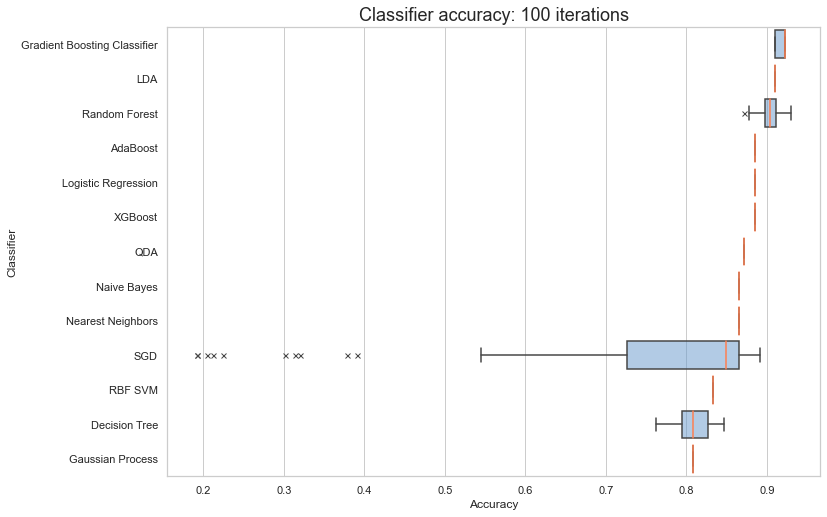

In [17]:
rows = []
for name in names:
    for row in results[name]:
        rows.append([name, row])
d = pd.DataFrame(rows, columns=['Classifier', 'Accuracy'])

grouped = d.loc[:,['Classifier', 'Accuracy']] \
    .groupby(['Classifier']) \
    .median() \
    .sort_values(by='Accuracy', ascending = False)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid") 

sns.boxplot(data=d, x="Accuracy", y="Classifier", order = grouped.index,
           flierprops={"marker": "x"},
           boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           ).set_title('Classifier accuracy: 100 iterations', fontsize=18)

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

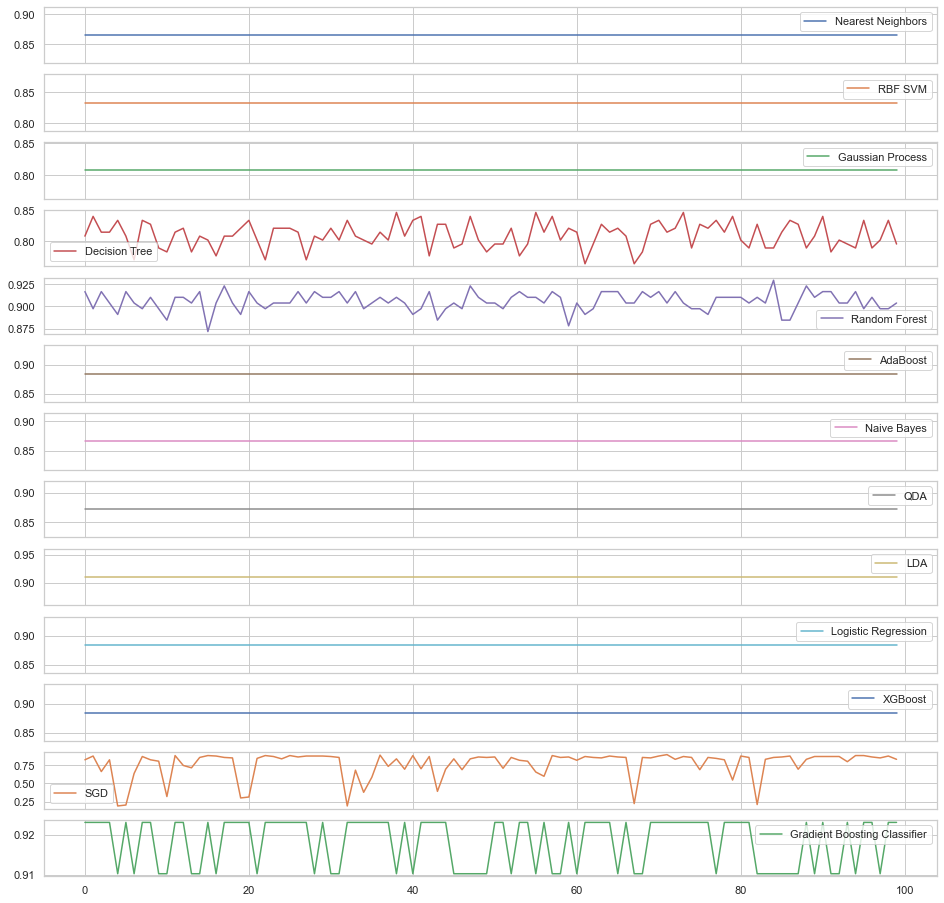

In [18]:
my_df = pd.DataFrame(data=results, columns=names)
my_df.plot(subplots=True, layout=(13,1), figsize=(16,16))

To compare classifier scores, we plot them to a single plot.

<AxesSubplot:>

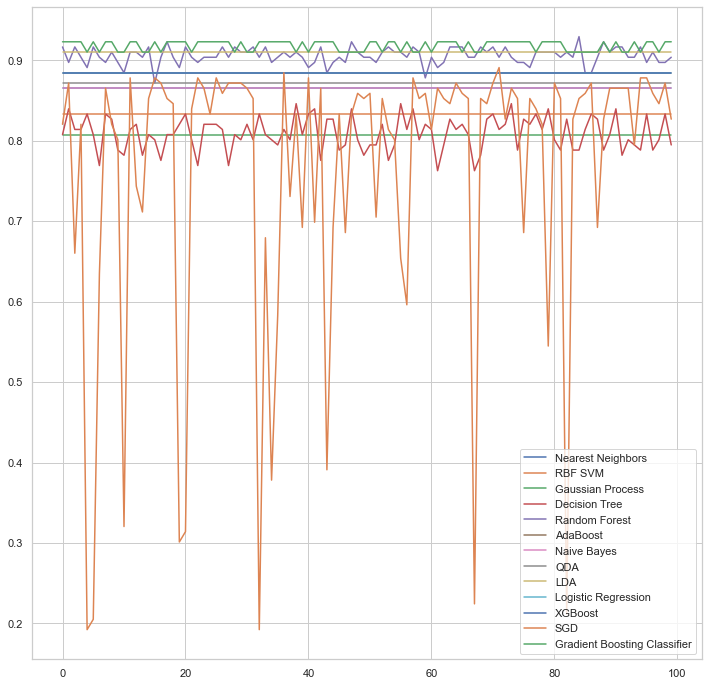

In [19]:
my_df.plot(figsize=(12,12))

# Plot classifer runtime

Text(0.5, 1.0, 'Classifier runtime: 100 iterations')

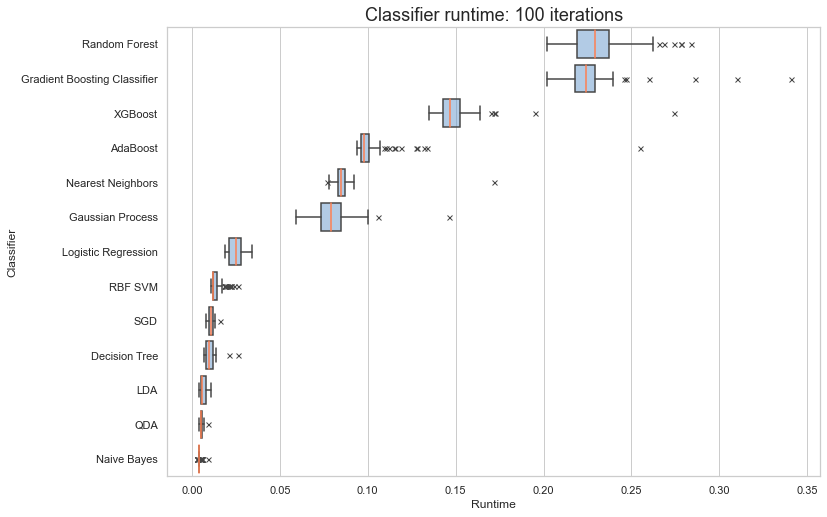

In [20]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df = time_df.melt(ignore_index=False)
time_df = time_df.rename(columns={'variable': 'Classifier', 'value': 'Runtime'}) 

grouped = time_df.loc[:,['Classifier', 'Runtime']] \
    .groupby(['Classifier']) \
    .median() \
    .sort_values(by='Runtime', ascending = False)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid") 

sns.boxplot(data=time_df, x="Runtime", y="Classifier", order = grouped.index,
           flierprops={"marker": "x"},
           boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}
           ).set_title('Classifier runtime: 100 iterations', fontsize=18)

<AxesSubplot:>

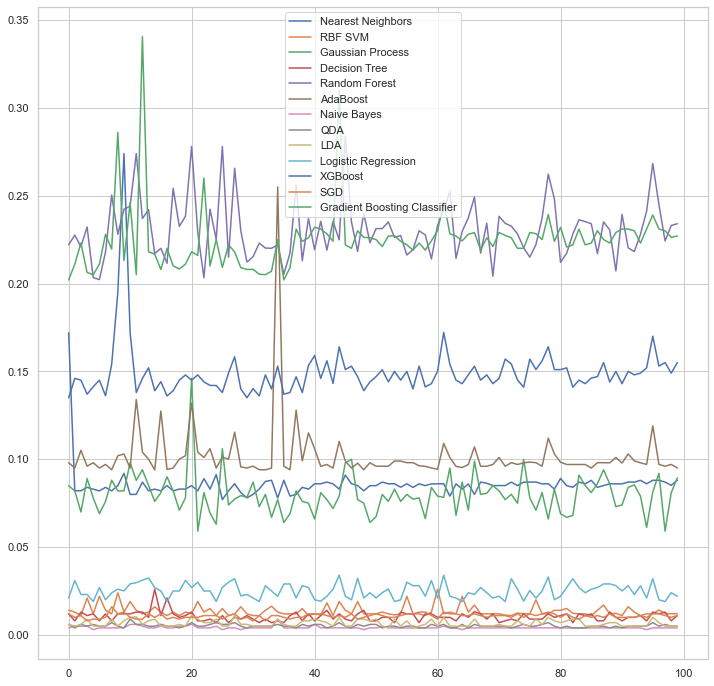

In [21]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df.plot(figsize=(12,12))

# How long one run took on average

In [22]:
time_mean_results = []
for key in names:
    mean = np.array(time_result[key]).mean()
    time_mean_results.append(mean)
    
timeMeanDf = pd.DataFrame(data=[time_mean_results], columns=names).T.sort_values(by=0, ascending=False)
timeMeanDf

,0
Random Forest,0.230745
Gradient Boosting Classifier,0.225133
XGBoost,0.149266
AdaBoost,0.101582
Nearest Neighbors,0.085635
Gaussian Process,0.079855
Logistic Regression,0.025042
RBF SVM,0.013621
SGD,0.010750
Decision Tree,0.010463


... median

In [23]:
time_median_results = []
for key in names:
    median = np.median(time_result[key])
    time_median_results.append(median)
    
timemedianDf = pd.DataFrame(data=[time_median_results], columns=names).T.sort_values(by=0, ascending=False)
timemedianDf

,0
Random Forest,0.229326
Gradient Boosting Classifier,0.224023
XGBoost,0.146956
AdaBoost,0.097772
Nearest Neighbors,0.085002
Gaussian Process,0.079155
Logistic Regression,0.024998
RBF SVM,0.012038
SGD,0.010999
Decision Tree,0.010003


# How long 100 iterations took per classifier

In [24]:
time_sum_results = []
for key in names:
    summed = np.array(time_result[key]).sum()
    time_sum_results.append(summed)
    
timeSumDf = pd.DataFrame(data=[time_sum_results], columns=names).T.sort_values(by=0, ascending=False)
timeSumDf

,0
Random Forest,23.074545
Gradient Boosting Classifier,22.513313
XGBoost,14.926595
AdaBoost,10.158175
Nearest Neighbors,8.563465
Gaussian Process,7.985512
Logistic Regression,2.504153
RBF SVM,1.362134
SGD,1.074958
Decision Tree,1.046303


# Average accuracy of each classifier based on 100 runs

In [25]:
mean_results = []
for key in names:
    mean = np.array(results[key]).mean()
    mean_results.append(mean)
    
meanDf = pd.DataFrame(data=[mean_results], columns=names).T.sort_values(by=0, ascending=False)
meanDf

,0
Gradient Boosting Classifier,0.918205
LDA,0.910256
Random Forest,0.905705
AdaBoost,0.884615
Logistic Regression,0.884615
XGBoost,0.884615
QDA,0.871795
Nearest Neighbors,0.865385
Naive Bayes,0.865385
RBF SVM,0.833333


# Median accuracy of each classifier based on 100 runs

In [26]:
median_results = []
for key in names:
    median = np.median(results[key])
    median_results.append(median)
    
medianDf = pd.DataFrame(data=[median_results], columns=names).T.sort_values(by=0, ascending=False)
medianDf

,0
Gradient Boosting Classifier,0.923077
LDA,0.910256
Random Forest,0.903846
AdaBoost,0.884615
Logistic Regression,0.884615
XGBoost,0.884615
QDA,0.871795
Nearest Neighbors,0.865385
Naive Bayes,0.865385
SGD,0.849359


## Results

When looking only accuracies, it seems that the best performing classifier is [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). **But what about runtime?**  
Next, we are going to rank classifers based on how they ranked in accuracy and runtime leaderboards. The higher the accuracy, the higher the rank. The lower the runtime, the higher the rank.

In [27]:
runtime_df = timeMeanDf.copy()
runtime_df['runtime_rank'] = list(reversed(range(1, len(runtime_df) + 1))) # here higher runtime is worse, so we reverse
runtime_df.rename( columns={0 :'runtime'}, inplace=True )
runtime_df.index.name = 'Classifier'

accuracy_df = meanDf.copy()
accuracy_df['accuracy_rank'] = range(1, len(accuracy_df) + 1)
accuracy_df.rename( columns={0 :'accuracy'}, inplace=True )
accuracy_df.index.name = 'Classifier'


df_merged = pd.merge(runtime_df, accuracy_df, how='inner', on = 'Classifier')
df_merged['total_rank'] = df_merged.apply(lambda row: row.runtime_rank + row.accuracy_rank, axis=1)
df_merged['total_rank'] = df_merged['total_rank'].astype('int')
df_merged = df_merged.sort_values(by=['total_rank'])
df_merged = df_merged.reset_index(level=0)
df_merged

,Classifier,runtime,runtime_rank,accuracy,accuracy_rank,total_rank
0,LDA,0.006605,3,0.910256,2,5
1,QDA,0.005180,2,0.871795,7,9
2,Naive Bayes,0.004172,1,0.865385,9,10
3,Logistic Regression,0.025042,7,0.884615,5,12
4,Gradient Boosting Classifier,0.225133,12,0.918205,1,13
5,AdaBoost,0.101582,10,0.884615,4,14
6,Decision Tree,0.010463,4,0.809231,11,15
7,Random Forest,0.230745,13,0.905705,3,16
8,RBF SVM,0.013621,6,0.833333,10,16
9,XGBoost,0.149266,11,0.884615,6,17


The top 5 classifers based on accuracy **and** runtime are LDA, QDA, Naive Bayes, Logistic Regression and Gradient Boosting Classifier. So, the table above shows that even though Gradient Boosting Classifer achieved the accuracy of 0.918974, the LDA classifer performed only 1% worse (0.008 points), but achieved the result 37.6 times faster (0.221434/0.005883). 

While this is a great and quite an easy way to see the runtime vs accuracy tradeoff, in our case the evaluation metric for this Kaggle competition is only accuracy. Additionally, due to the nature of our dataset, i.e it being quite lightweight and not having much rows, we can afford for the model to train longer until it outputs a better accuracy and therefore, we can afford to run "slower" models. If we had a significantly larger dataset (or the data would be constantly added), then this accuracy-runtime tradeoff would have to be taken into account.

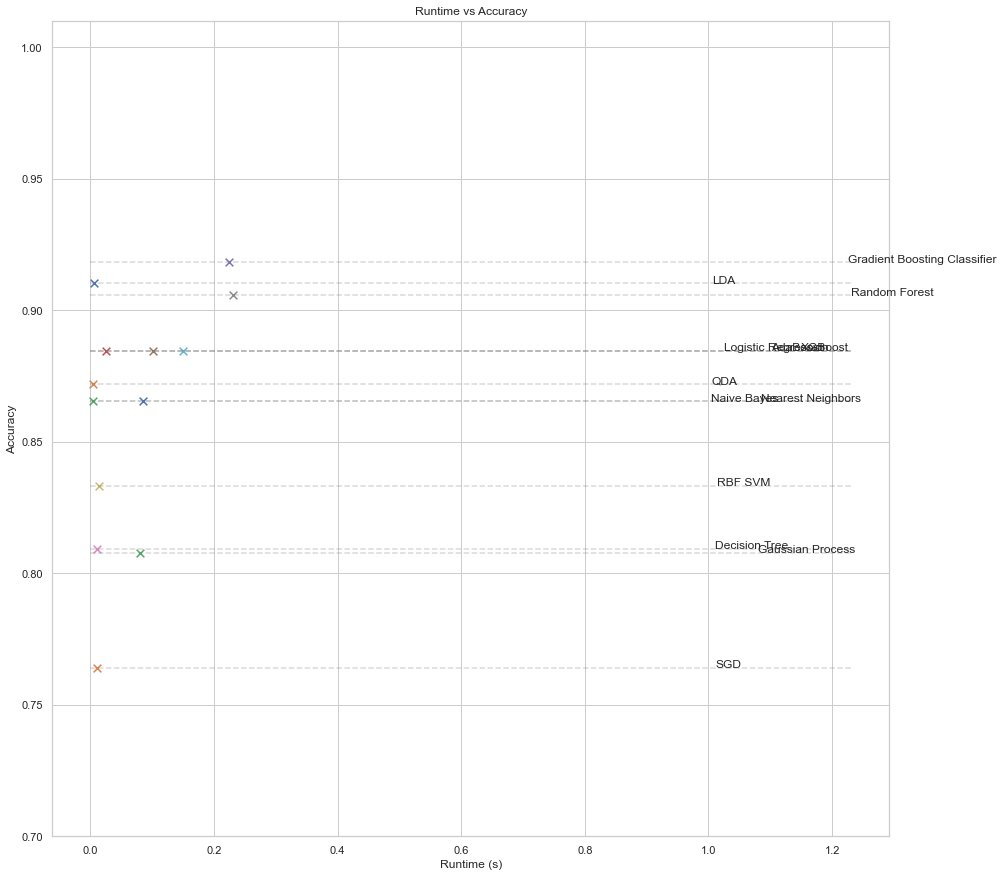

In [28]:
plt.figure(figsize = [15, 15])

for i in range(len(df_merged)):
    # Add classifier values
    plt.scatter(df_merged['runtime'][i], 
            df_merged['accuracy'][i], 
            label = df_merged['Classifier'][i],
               marker = 'x',
               s = 60)
    # Add a dashed lined marking the best accuracy threshold for classifier
    plt.hlines(y = df_merged['accuracy'][i], 
               xmin=0, 
               xmax = np.max(df_merged['runtime'])+1,
              linestyles = 'dashed', alpha = 0.3, color = 'grey')
    # Add classifier name
    plt.annotate(df_merged['Classifier'][i], 
                 (df_merged['runtime'][i]+1, 
                  df_merged['accuracy'][i]),
                )
plt.ylim(bottom = 0.70, top = 1.01)
plt.xlabel('Runtime (s)')
plt.ylabel('Accuracy')
plt.title('Runtime vs Accuracy')
plt.show();

Save top5

In [36]:
top5 = ','.join(df_merged['Classifier'][:5])
text_file = open("top5.txt", "w")
n = text_file.write(top5)
text_file.close()
print(top5.split(','))

['LDA', 'QDA', 'Naive Bayes', 'Logistic Regression', 'Gradient Boosting Classifier']
